## Compare targets for the dsph KSP paper
Michele Doro
Last update: October 2024

In [5]:
#from dmbounds import dmbounds as bounds
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np

from scipy import interpolate

import pandas as pd

# Define limits files
Extract limits from gDMbounds repository

In [2]:
path  = "../../"
pathb  = "../../dmbounds/bounds/"
steigman = ascii.read(path + "dmbounds/modelpredictions/wimp_steigman2012_numerical.ecsv")




## 1/ Compare dSphs limits -- Annihilation Einasto and bb

In [3]:
magic_22_mdsph_ann   = ascii.read(pathb + "magic/magic_2022_multidsph_ann_bb.ecsv")
hawc_18_mdsph_ann    = ascii.read(pathb + "hawc/hawc_2018_multidsph_ann_bb_notri2.ecsv")
hess_20_mdsph_ann    = ascii.read(pathb + "hess/hess_2020_multidsph_ann_bb.ecsv")
fermi_23_mdsph_ann   = ascii.read(pathb + "lat/lat_2023_multidsph_ann_bb_measured.ecsv")
lhaaso_24_mdsph_ann  = ascii.read(pathb + "lhaaso/lhaaso_2024_multidsph_ann_bb.ecsv")
veritas_17_mdsph_ann = ascii.read(pathb +  "veritas/veritas_2017_multidsph_ann_bb.ecsv")

#ctao_combined_ann_bb = ascii.read(path + "sandbox/temp/dsphksp_combined_Wil1_and_CBe_Einasto_600h_bb.csv")


In [27]:
ctao_combined_ann = pd.read_csv('sv_limits_quantiles/Combined_Annichilation_CBe_Wil1_T600.csv')

mask_ann_bb = (ctao_combined_ann['quantile'] == 0.5) & (ctao_combined_ann['profile']=="Einasto") & (ctao_combined_ann['ch']=='b')
mask_ann_tautau = (ctao_combined_ann['quantile'] == 0.5) & (ctao_combined_ann['profile']=="Einasto") & (ctao_combined_ann['ch']=='tau')

ctao_combined_ann_bb = ctao_combined_ann[mask_ann_bb]
ctao_combined_ann_tautau = ctao_combined_ann[mask_ann_tautau]

In [28]:
ctao_combined_dec = pd.read_csv('sv_limits_quantiles/Combined_Decay_CBe_UMi_T600.csv')

mask_dec_bb = (ctao_combined_dec['quantile'] == 0.5) & (ctao_combined_dec['profile']=="Einasto") & (ctao_combined_dec['ch']=='b')
mask_dec_tautau = (ctao_combined_dec['quantile'] == 0.5) & (ctao_combined_dec['profile']=="Einasto") & (ctao_combined_dec['ch']=='tau')

ctao_combined_dec_bb = ctao_combined_dec[mask_dec_bb]
ctao_combined_dec_tautau = ctao_combined_dec[mask_dec_tautau]

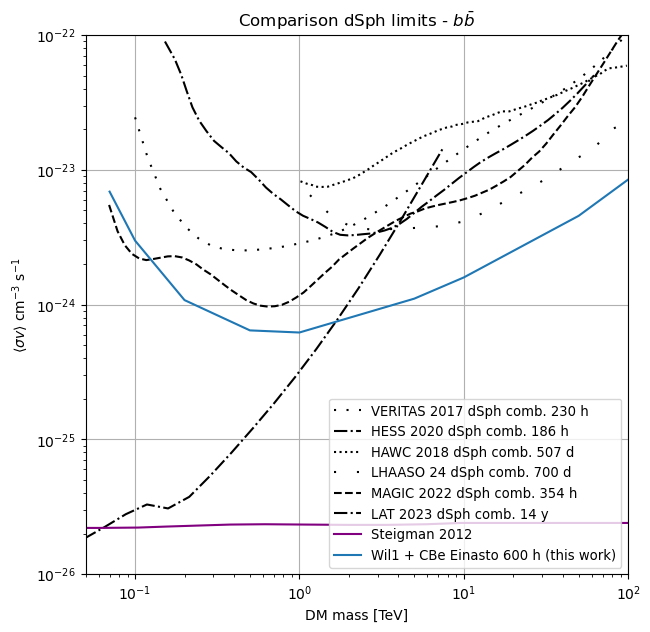

In [41]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ cm$^{-3}$ s$^{-1}$")
plt.xlim(5e-2,1e2)
plt.ylim(1e-26,1e-22)
#plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
plt.title(r'Comparison dSph limits - $b\bar{b}$')


plt.loglog(veritas_17_mdsph_ann['mass']*1e-3,veritas_17_mdsph_ann['sigmav'],color='k',linestyle=(0, (1, 5)),label="VERITAS 2017 dSph comb. 230 h")
plt.loglog(hess_20_mdsph_ann['mass']*1,hess_20_mdsph_ann['sigmav'],color='k',linestyle='dashdot',label="HESS 2020 dSph comb. 186 h")
plt.loglog(hawc_18_mdsph_ann['mass']*1,hawc_18_mdsph_ann['sigmav'],color='k',linestyle='dotted',label="HAWC 2018 dSph comb. 507 d")
plt.loglog(lhaaso_24_mdsph_ann['mass'],lhaaso_24_mdsph_ann['sigmav'],color='k',linestyle=(0, (1, 10)),label="LHAASO 24 dSph comb. 700 d")
plt.loglog(magic_22_mdsph_ann['mass']*1e-3,magic_22_mdsph_ann['sigmav'],color='k',linestyle='dashed',label="MAGIC 2022 dSph comb. 354 h")
plt.loglog(fermi_23_mdsph_ann['mass']*1e-3,fermi_23_mdsph_ann['sigmav'],color='k',linestyle='dashdot',label="LAT 2023 dSph comb. 14 y")



plt.loglog(steigman['mass']*1e-3,steigman['sigmav'],color='purple',label="Steigman 2012")
#plt.fill_between(steigman['mass']*1e-3, 1e-28, steigman['sigmav'],color='tab:purple',alpha=0.2,label="Steigman 2020")


plt.loglog(ctao_combined_ann_bb['mass']*1e-3,ctao_combined_ann_bb['sigma_v'],label="Wil1 + CBe Einasto 600 h (this work)")


plt.grid()
#plt.legend(loc="best",ncol=2)
plt.legend(loc="lower right",ncol=1, fontsize="9.5")

plt.savefig("plot_comparedsphs_ann_einasto_bb.png")

## 2/ Compare dSphs limits -- Annihilation Einasto and tautau

In [31]:
magic_22_mdsph_ann   = ascii.read(pathb + "magic/magic_2022_multidsph_ann_tautau.ecsv")
hawc_18_mdsph_ann    = ascii.read(pathb + "hawc/hawc_2018_multidsph_ann_tautau_notri2.ecsv")
hess_20_mdsph_ann    = ascii.read(pathb + "hess/hess_2020_multidsph_ann_tautau.ecsv")
fermi_23_mdsph_ann   = ascii.read(pathb + "lat/lat_2023_multidsph_ann_tautau_measured.ecsv")
lhaaso_24_mdsph_ann  = ascii.read(pathb + "lhaaso/lhaaso_2024_multidsph_ann_tautau.ecsv")
veritas_17_mdsph_ann = ascii.read(pathb +  "veritas/veritas_2017_multidsph_ann_tautau.ecsv")



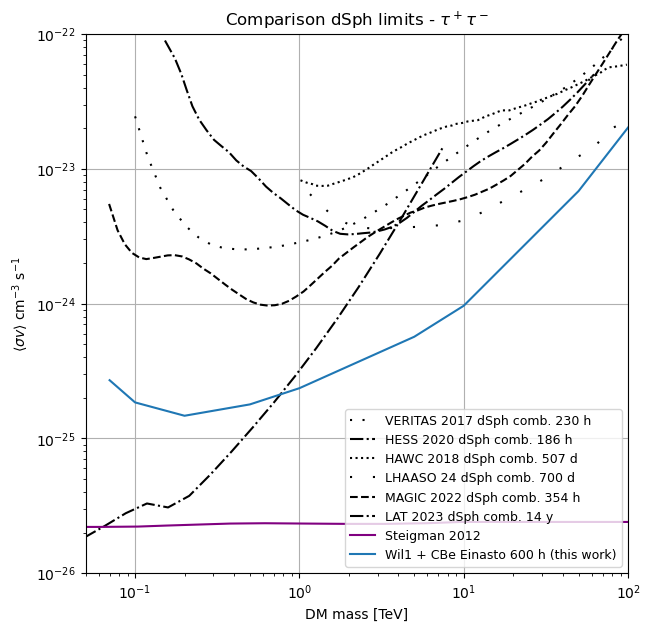

In [32]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ cm$^{-3}$ s$^{-1}$")
plt.xlim(5e-2,1e2)
plt.ylim(1e-26,1e-22)
plt.title(r'Comparison dSph limits - $\tau^+\tau^-$')
#plt.title(r'Comparison dSph limits - $b\bar{b}$')


plt.loglog(veritas_17_mdsph_ann['mass']*1e-3,veritas_17_mdsph_ann['sigmav'],color='k',linestyle=(0, (1, 5)),label="VERITAS 2017 dSph comb. 230 h")
plt.loglog(hess_20_mdsph_ann['mass']*1,hess_20_mdsph_ann['sigmav'],color='k',linestyle='dashdot',label="HESS 2020 dSph comb. 186 h")
plt.loglog(hawc_18_mdsph_ann['mass']*1,hawc_18_mdsph_ann['sigmav'],color='k',linestyle='dotted',label="HAWC 2018 dSph comb. 507 d")
plt.loglog(lhaaso_24_mdsph_ann['mass'],lhaaso_24_mdsph_ann['sigmav'],color='k',linestyle=(0, (1, 10)),label="LHAASO 24 dSph comb. 700 d")
plt.loglog(magic_22_mdsph_ann['mass']*1e-3,magic_22_mdsph_ann['sigmav'],color='k',linestyle='dashed',label="MAGIC 2022 dSph comb. 354 h")
plt.loglog(fermi_23_mdsph_ann['mass']*1e-3,fermi_23_mdsph_ann['sigmav'],color='k',linestyle='dashdot',label="LAT 2023 dSph comb. 14 y")

plt.loglog(steigman['mass']*1e-3,steigman['sigmav'],color='purple',label="Steigman 2012")
#plt.fill_between(steigman['mass']*1e-3, 1e-28, steigman['sigmav'],color='tab:purple',alpha=0.2,label="Steigman 2020")

plt.loglog(ctao_combined_ann_tautau['mass']*1e-3,ctao_combined_ann_tautau['sigma_v'],label="Wil1 + CBe Einasto 600 h (this work)")


plt.grid()
#plt.legend(loc="best",ncol=2)
plt.legend(loc="lower right",ncol=1, fontsize="9")

plt.savefig("plot_comparedsphs_ann_einasto_tautau.png")


## 3/ Compare targets

In [33]:
fermi_23_mdsph_ann_bb   = ascii.read(pathb + "lat/lat_2023_multidsph_ann_bb_measured.ecsv")
fermi_23_mdsph_ann_tautau   = ascii.read(pathb + "lat/lat_2023_multidsph_ann_tautau_measured.ecsv")

atlas_15_bb          = ascii.read(pathb + "collider/collider_2015_atlascms_ann_bb.ecsv")
atlas_15_tautau          = ascii.read(pathb + "collider/collider_2015_atlascms_ann_tautau.ecsv")
coupp_15_bb          = ascii.read(pathb + "directsearches/directsearches_2015_coupp_ann_bb.ecsv")
coupp_15_tautau          = ascii.read(pathb + "directsearches/directsearches_2015_coupp_ann_tautau.ecsv")

cta_lmc_nfw_bb              = ascii.read(pathb  + "cta/cta_2023_LMC_ann_bb_sens_NFWmean.ecsv")
cta_lmc_iso_bb              = ascii.read(pathb  + "cta/cta_2023_LMC_ann_bb_sens_ISOmean.ecsv")
cta_lmc_nfw_tautau          = ascii.read(pathb  + "cta/cta_2023_LMC_ann_tautau_sens_NFWmean.ecsv")
cta_lmc_iso_tautau          = ascii.read(pathb  + "cta/cta_2023_LMC_ann_tautau_sens_ISOmean.ecsv")

cta_gc_einasto_bb          = ascii.read(pathb  + "cta/cta_2021_gc_ann_bb_sens.ecsv")
cta_gc_einasto_tautau      = ascii.read(pathb  + "cta/cta_2021_gc_ann_tautau_sens.ecsv")
cta_gc_core_bb             = ascii.read(path  + "sandbox/temp/cta_2021_gc_WW_core.ecsv")

cta_subhalos_einasto_bb    = ascii.read(path  + "sandbox/temp/cta_subhalo_bb.ecsv")
cta_subhalos_einasto_tautau    = ascii.read(path  + "sandbox/temp/cta_subhalo_tautau.ecsv")

cta_perseus_einasto_bb     = ascii.read(path  + "sandbox/temp/cta_perseus_ksp_bb.csv")
cta_perseus_einasto_tautau     = ascii.read(path  + "sandbox/temp/cta_perseus_ksp_tautau.csv")

#lhaaso_24_mdsph_ann_bb  = ascii.read(pathb + "lhaaso/lhaaso_2024_multidsph_ann_bb.ecsv")
#lhaaso_24_mdsph_tautau_bb  = ascii.read(pathb + "lhaaso/lhaaso_2024_multidsph_ann_tautau.ecsv")

#ctao_combined_ann_bb = ascii.read(path + "sandbox/temp/dsphksp_combined_Wil1_and_CBe_Einasto_600h_bb.csv")
#ctao_combined_ann_tautau = ascii.read(path + "sandbox/temp/dsphksp_combined_Wil1_and_CBe_Einasto_600h_tautau.csv")

#thiswork_uma3_einasto_300_bb = ascii.read(path + "sandbox/temp/dsphksp_uma3_Einasto_300h_bb.csv")
thiswork_uma3_einasto_300_bb = ascii.read(path + "sandbox/temp/dsphksp_Scl_Einasto_100h_bb.csv")
thiswork_uma3_einasto_300_tautau = ascii.read(path + "sandbox/temp/dsphksp_Scl_Einasto_100h_tautau.csv")



## 3.1 Compare targets -- Annihilation Einasto and bb

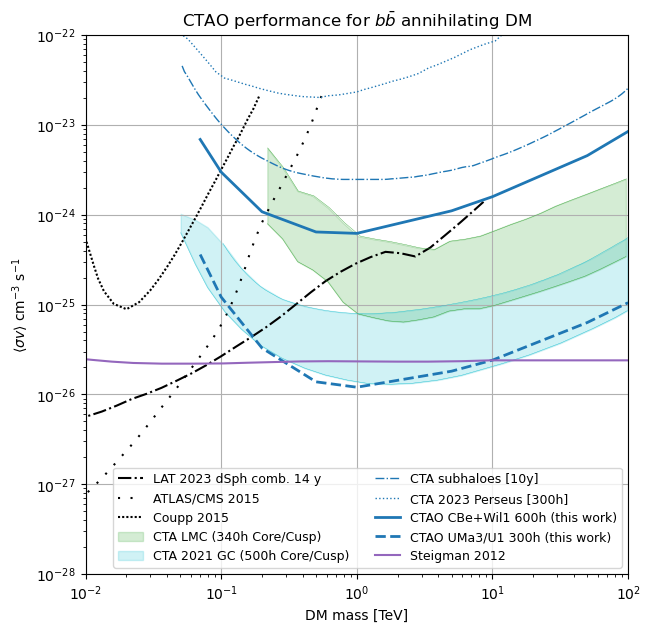

In [34]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ cm$^{-3}$ s$^{-1}$")
plt.xlim(1e-2,1e2)
plt.ylim(1e-28,1e-22)
plt.title(r'CTAO performance for $b\bar{b}$ annihilating DM')



# Other instrument limits
plt.loglog(fermi_23_mdsph_ann_bb['mass']*1e-3,fermi_23_mdsph_ann_bb['sigmav'],color='k',linestyle='dashdot',label="LAT 2023 dSph comb. 14 y")
#plt.loglog(hess_12_fornax['mass'],hess_12_fornax['sigmav'],color='k',linestyle=(0, (1, 3)),label="HESS Fornax Cluster")
#plt.loglog(hess_11_m15['mass'],hess_11_m15['sigmav'],color='k',linestyle=(0, (1, 5)),label="HESS M15")
plt.loglog(atlas_15_bb['mass']*1e-3,atlas_15_bb['sigmav'],color='k',linestyle=(0, (1, 5)),label="ATLAS/CMS 2015")
plt.loglog(coupp_15_bb['mass']*1e-3,coupp_15_bb['sigmav'],color='k',linestyle=(0, (1, 1)),label="Coupp 2015")

# Other CTA limits
plt.loglog(cta_lmc_nfw_bb['mass']*1e-3,cta_lmc_nfw_bb['sigmav'], color='tab:green',linestyle='solid',linewidth=0.25,
           )
plt.loglog(cta_lmc_iso_bb['mass']*1e-3,cta_lmc_iso_bb['sigmav'], color='tab:green',linestyle='solid',linewidth=0.25,
           )

plt.fill_between(cta_lmc_nfw_bb['mass']*1e-3, 
                 cta_lmc_nfw_bb['sigmav'], 
                 cta_lmc_iso_bb['sigmav'], 
                 color='tab:green', alpha=0.2, label="CTA LMC (340h Core/Cusp)")


plt.loglog(cta_gc_einasto_bb['mass']*1e-3,cta_gc_einasto_bb['sigmav'],color='tab:cyan',linestyle='solid', linewidth=0.25,
           )
plt.loglog(cta_gc_core_bb['mass']*1e-3,cta_gc_core_bb['sigmav'],color='tab:cyan',linestyle='solid', linewidth=0.25,
           )

# Interpolate cta_gc_core_bb to match cta_gc_einasto_bb mass points
f = interpolate.interp1d(cta_gc_core_bb['mass'], cta_gc_core_bb['sigmav'], 
                         kind='linear', fill_value='extrapolate')
interpolated_core_sigmav = f(cta_gc_einasto_bb['mass'])

# Fill between GC Cusp and Core curves
plt.fill_between(cta_gc_einasto_bb['mass']*1e-3, 
                 cta_gc_einasto_bb['sigmav'], 
                 interpolated_core_sigmav, 
                 color='tab:cyan', alpha=0.2,label="CTA 2021 GC (500h Core/Cusp)")




plt.loglog(cta_subhalos_einasto_bb['mass']*1e-3,cta_subhalos_einasto_bb['sigmav'], color='tab:blue',linestyle='dashdot',linewidth=1,
           label="CTA subhaloes [10y]")
plt.loglog(cta_perseus_einasto_bb['mass'],cta_perseus_einasto_bb['sigmav'], color='tab:blue',linestyle='dotted',linewidth=1,
           label="CTA 2023 Perseus [300h]")


# This work
plt.loglog(ctao_combined_ann_bb['mass']*1e-3,ctao_combined_ann_bb['sigma_v'],label="CTAO CBe+Wil1 600h (this work)", color='tab:blue',linewidth=2)

k = 500*np.sqrt(3)
plt.loglog(thiswork_uma3_einasto_300_bb['mass']*1e-3,thiswork_uma3_einasto_300_bb['sigmav']/k,label="CTAO UMa3/U1 300h (this work)", color='tab:blue', linestyle='dashed',linewidth=2)


# Steigman reference
#plt.loglog(steigman['mass']*1e-3,steigman['sigmav'],color='tab:purple',label="Steigman 2012")
plt.loglog(steigman['mass']*1e-3, steigman['sigmav'],color='tab:purple',label="Steigman 2012")


plt.grid()
plt.legend(loc="best",ncol=2, fontsize="9")

plt.savefig("compare_cta_target_bb.png")

## 3.2 Compare targets -- Annihilation Einasto and tautau

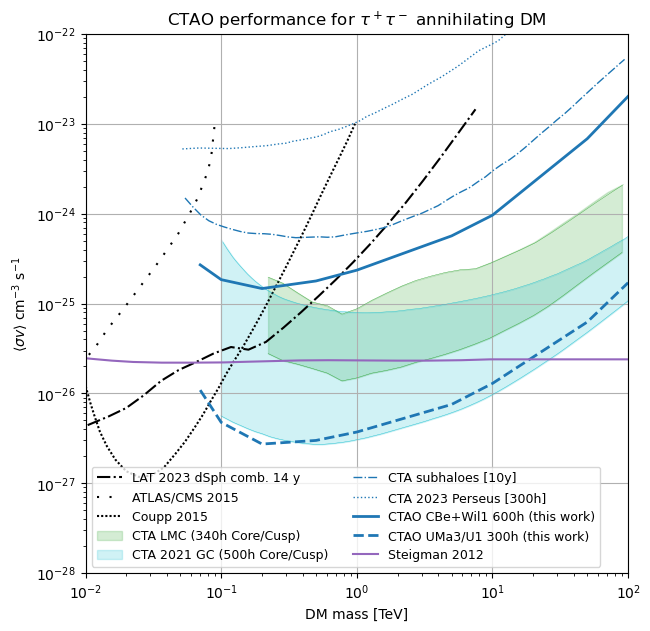

In [35]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\langle\sigma v \rangle$ cm$^{-3}$ s$^{-1}$")
plt.xlim(1e-2,1e2)
plt.ylim(1e-28,1e-22)
plt.title(r'CTAO performance for $\tau^+\tau^-$ annihilating DM')



# Other instrument limits
plt.loglog(fermi_23_mdsph_ann_tautau['mass']*1e-3,fermi_23_mdsph_ann_tautau['sigmav'],color='k',linestyle='dashdot',label="LAT 2023 dSph comb. 14 y")
#plt.loglog(hess_12_fornax['mass'],hess_12_fornax['sigmav'],color='k',linestyle=(0, (1, 3)),label="HESS Fornax Cluster")
#plt.loglog(hess_11_m15['mass'],hess_11_m15['sigmav'],color='k',linestyle=(0, (1, 5)),label="HESS M15")
plt.loglog(atlas_15_tautau['mass']*1e-3,atlas_15_tautau['sigmav'],color='k',linestyle=(0, (1, 5)),label="ATLAS/CMS 2015")
plt.loglog(coupp_15_tautau['mass']*1e-3,coupp_15_tautau['sigmav'],color='k',linestyle=(0, (1, 1)),label="Coupp 2015")

# Other CTA limits
plt.loglog(cta_lmc_nfw_tautau['mass']*1e-3,cta_lmc_nfw_tautau['sigmav'], color='tab:green',linestyle='solid',linewidth=0.25,
           )
plt.loglog(cta_lmc_iso_tautau['mass']*1e-3,cta_lmc_iso_tautau['sigmav'], color='tab:green',linestyle='solid',linewidth=0.25,
           )

plt.fill_between(cta_lmc_nfw_tautau['mass']*1e-3, 
                 cta_lmc_nfw_tautau['sigmav'], 
                 cta_lmc_iso_tautau['sigmav'], 
                 color='tab:green', alpha=0.2, label="CTA LMC (340h Core/Cusp)")


plt.loglog(cta_gc_einasto_tautau['mass']*1e-3,cta_gc_einasto_tautau['sigmav'],color='tab:cyan',linestyle='solid', linewidth=0.25,
           )
plt.loglog(cta_gc_core_bb['mass']*1e-3,cta_gc_core_bb['sigmav'],color='tab:cyan',linestyle='solid', linewidth=0.25,
           )

# Interpolate cta_gc_core_bb to match cta_gc_einasto_bb mass points
f = interpolate.interp1d(cta_gc_core_bb['mass'], cta_gc_core_bb['sigmav'], 
                         kind='linear', fill_value='extrapolate')
interpolated_core_sigmav = f(cta_gc_einasto_tautau['mass'])

# Fill between GC Cusp and Core curves
plt.fill_between(cta_gc_einasto_tautau['mass']*1e-3, 
                 cta_gc_einasto_tautau['sigmav'], 
                 interpolated_core_sigmav, 
                 color='tab:cyan', alpha=0.2,label="CTA 2021 GC (500h Core/Cusp)")



plt.loglog(cta_subhalos_einasto_tautau['mass']*1e-3,cta_subhalos_einasto_tautau['sigmav'], color='tab:blue',linestyle='dashdot',linewidth=1,
           label="CTA subhaloes [10y]")
plt.loglog(cta_perseus_einasto_tautau['mass'],cta_perseus_einasto_tautau['sigmav'], color='tab:blue',linestyle='dotted',linewidth=1,
           label="CTA 2023 Perseus [300h]")


# This work
plt.loglog(ctao_combined_ann_tautau['mass']*1e-3,ctao_combined_ann_tautau['sigma_v'],label="CTAO CBe+Wil1 600h (this work)", color='tab:blue',linewidth=2)
plt.loglog(thiswork_uma3_einasto_300_tautau['mass']*1e-3,thiswork_uma3_einasto_300_tautau['sigma_v']/k,label="CTAO UMa3/U1 300h (this work)", color='tab:blue', linestyle='dashed',linewidth=2)


# Steigman reference
#plt.loglog(steigman['mass']*1e-3,steigman['sigmav'],color='tab:purple',label="Steigman 2012")
plt.loglog(steigman['mass']*1e-3, steigman['sigmav'],color='tab:purple',label="Steigman 2012")


plt.grid()
plt.legend(loc="best",ncol=2, fontsize="9")

plt.savefig("compare_cta_target_tautau.png")

## 4 Compare targets -- Decay Einasto and bb

In [37]:
fermi_12_gc_dec_bb   = ascii.read(pathb + "lat/lat_2012_gc_dec_bb.ecsv")
fermi_12_gc_dec_tautau   = ascii.read(pathb + "lat/lat_2012_gc_dec_bb.ecsv")

fermi_16_mdsph_dec_bb   = ascii.read(pathb + "lat/lat_2016_multidsph_dec_bb.ecsv")
fermi_16_mdsph_dec_tautau   = ascii.read(pathb + "lat/lat_2016_multidsph_dec_tautau.ecsv")

ando_2015_dec_bb = ascii.read("./ando_2015_fig4_decay_bb.ecsv")

magic_18_perseus_dec_bb  = ascii.read(pathb + "magic/magic_2018_perseuscluster_dec_bb.ecsv")
magic_18_perseus_dec_tautau  = ascii.read(pathb + "magic/magic_2018_perseuscluster_dec_tautau.ecsv")

cirelli_dec_bb = ascii.read(path+"sandbox/temp/cirelli_2012_cta_fornax_decay_bb.csv")
cirelli_dec_tautau = ascii.read(path+"sandbox/temp/cirelli_2012_cta_fornax_decay_tautau.csv")
#cta_gc_einasto_bb          = ascii.read(pathb  + "cta/cta_2021_gc_ann_bb_sens.ecsv")
#cta_gc_einasto_tautau      = ascii.read(pathb  + "cta/cta_2021_gc_ann_tautau_sens.ecsv")
#cta_gc_core_bb             = ascii.read(path  + "sandbox/temp/cta_2021_gc_WW_core.ecsv")

cta_perseus_einasto_decay_bb     = ascii.read(pathb  + "cta/cta_2023_perseuscluster_dec_bb_sens.ecsv")
cta_perseus_einasto_decay_tautau     = ascii.read(pathb  + "cta/cta_2023_perseuscluster_dec_bb_sens.ecsv")

lhaaso_24_mdsph_dec_bb  = ascii.read(pathb + "lhaaso/lhaaso_2024_multidsph_dec_bb.ecsv")
lhaaso_24_mdsph_dec_tautau  = ascii.read(pathb + "lhaaso/lhaaso_2024_multidsph_dec_tautau.ecsv")

ctao_combined_ann_decay_bb = ascii.read(path + "sandbox/temp/dsphksp_combined_Wil1_and_CBe_Einasto_600h_decay_bb.csv")
ctao_combined_ann_decay_tautau = ascii.read(path + "sandbox/temp/dsphksp_combined_Wil1_and_CBe_Einasto_600h_decay_tautau.csv")

#ctao_combined_dec_bb = ascii.read(path + "sandbox/temp/dsphksp_combined_UMi_and_CBe_Einasto_600h_decay_bb.csv")
#ctao_combined_dec_tautau = ascii.read(path + "sandbox/temp/dsphksp_combined_UMi_and_CBe_Einasto_600h_decay_tautau.csv")

thiswork_uma3_einasto_300_decay_bb = ascii.read(path + "sandbox/temp/dsphksp_Scl_Einasto_100h_dec_bb.csv")
thiswork_uma3_einasto_300_decay_tautau = ascii.read(path + "sandbox/temp/dsphksp_Scl_Einasto_100h_dec_tautau.csv")


## 4.1 Compare targets -- Decay Einasto and b


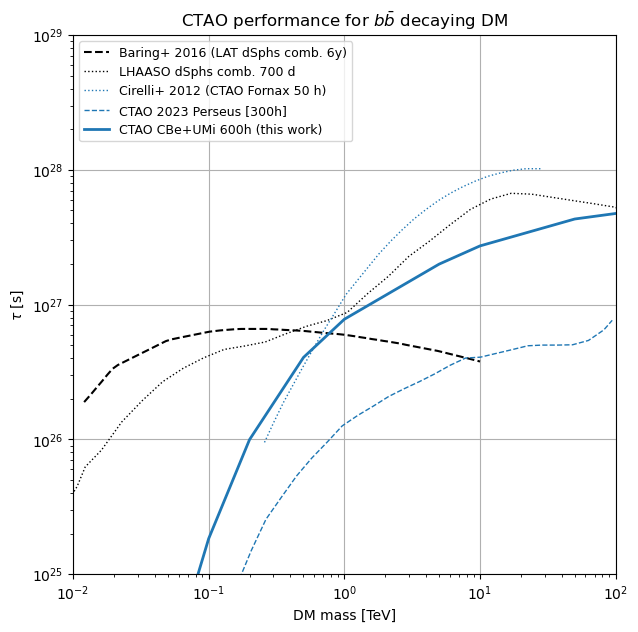

In [38]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\tau$ [s]")
plt.xlim(1e-2,1e2)
plt.ylim(1e25,1e29)
plt.title(r'CTAO performance for $b\bar{b}$ decaying DM')



# Other instrument limits
#plt.loglog(fermi_12_gc_dec_bb['mass']*1e-3,fermi_12_gc_dec_bb['tau'],color='k',linestyle='dashdot',label="LAT 2012 GC Halo")
plt.loglog(fermi_16_mdsph_dec_bb['mass']*1e-3,fermi_16_mdsph_dec_bb['tau'],color='k',linestyle='dashed',label="Baring+ 2016 (LAT dSphs comb. 6y)")
#plt.loglog(fermi_12_gc_dec_bb['mass']*1e-3,fermi_12_gc_dec_bb['tau'],color='tab:green',linestyle='dashed',label="LAT 2012 GC Halo")
#plt.loglog(ando_2015_dec_bb['mass']*1e-3,ando_2015_dec_bb['tau'],color='k',linestyle='dashdot',label="Ando+ 2015 (LAT EGRB 50 months)")




plt.loglog(lhaaso_24_mdsph_dec_bb['mass']*1e-3,lhaaso_24_mdsph_dec_bb['tau'], color='k',linestyle='dotted',linewidth=1,label="LHAASO dSphs comb. 700 d")

#plt.loglog(magic_18_perseus_dec_bb['mass']*1e-3,magic_18_perseus_dec_bb['tau'], color='tab:red',linestyle='dashed',linewidth=1,label="MAGIC 2018 Perseus ")
plt.loglog(cirelli_dec_bb['mass']*1e-3,cirelli_dec_bb['tau'], color='tab:blue',linestyle='dotted',linewidth=1,label="Cirelli+ 2012 (CTAO Fornax 50 h)")

plt.loglog(cta_perseus_einasto_decay_bb['mass'],cta_perseus_einasto_decay_bb['tau'], color='tab:blue',linestyle='dashed',linewidth=1,
           label="CTAO 2023 Perseus [300h]")

# This work
#plt.loglog(ctao_combined_ann_decay_bb['mass']*1e-3,ctao_combined_ann_decay_bb['tau'],label="CTAO CBe+Wil1 600h (this work)", color='tab:blue',linewidth=2)
plt.loglog(ctao_combined_dec_bb['mass']*1e-3,ctao_combined_dec_bb['tau'],label="CTAO CBe+UMi 600h (this work)", color='tab:blue',linewidth=2)


#plt.loglog(thiswork_uma3_einasto_300_decay_bb['mass']*1e-3,thiswork_uma3_einasto_300_decay_bb['tau']*k,label="CTAO UMa3/U1 300h (this work)", color='tab:blue', linestyle='dashed',linewidth=2)



plt.grid()
#plt.legend(loc="best",ncol=2)
plt.legend(loc="upper left",ncol=1,fontsize="9")

plt.savefig("compare_cta_target_decay_bb.png")

## 4.2 Compare targets -- Decay Einasto and tautau


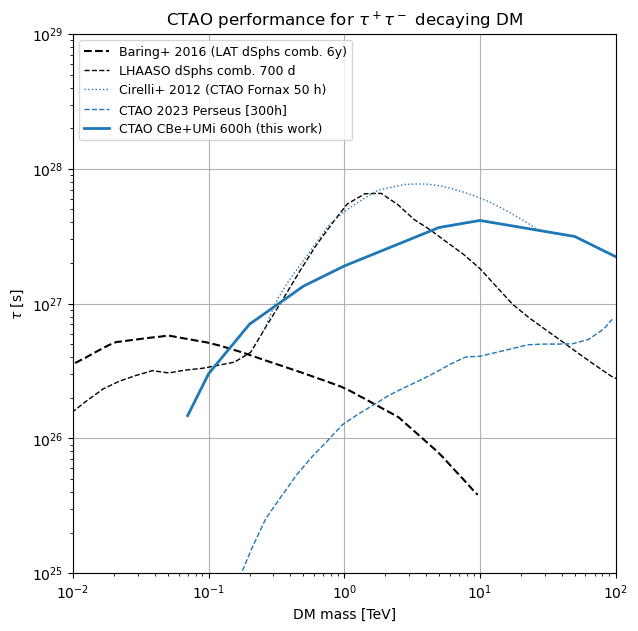

In [39]:
plt.figure(figsize=(7,7))
plt.xlabel("DM mass [TeV]")
plt.ylabel(r"$\tau$ [s]")
plt.xlim(1e-2,1e2)
plt.ylim(1e25,1e29)
plt.title(r'CTAO performance for $\tau^+\tau^-$ decaying DM')



# Other instrument limits
#plt.loglog(fermi_12_gc_dec_bb['mass']*1e-3,fermi_12_gc_dec_bb['tau'],color='k',linestyle='dashdot',label="LAT 2012 GC Halo")
plt.loglog(fermi_16_mdsph_dec_tautau['mass']*1e-3,fermi_16_mdsph_dec_tautau['tau'],color='k',linestyle='dashed',label="Baring+ 2016 (LAT dSphs comb. 6y)")



plt.loglog(lhaaso_24_mdsph_dec_tautau['mass']*1e-3,lhaaso_24_mdsph_dec_tautau['tau'], color='k',linestyle='dashed',linewidth=1,label="LHAASO dSphs comb. 700 d")


plt.loglog(cirelli_dec_tautau['mass']*1e-3,cirelli_dec_tautau['tau'], color='tab:blue',linestyle='dotted',linewidth=1,label="Cirelli+ 2012 (CTAO Fornax 50 h)")

plt.loglog(cta_perseus_einasto_decay_tautau['mass'],cta_perseus_einasto_decay_tautau['tau'], color='tab:blue',linestyle='dashed',linewidth=1,
           label="CTAO 2023 Perseus [300h]")

# This work
plt.loglog(ctao_combined_dec_tautau['mass']*1e-3,ctao_combined_dec_tautau['tau'],label="CTAO CBe+UMi 600h (this work)", color='tab:blue',linewidth=2)

#plt.loglog(thiswork_uma3_einasto_300_decay_tautau['mass']*1e-3,thiswork_uma3_einasto_300_decay_tautau['tau']*k,label="CTAO UMa3/U1 300h (this work)", color='tab:blue', linestyle='dashed',linewidth=2)


# Steigman reference
#plt.loglog(steigman['mass']*1e-3,steigman['sigmav'],color='tab:purple',label="Steigman 2012")
#plt.loglog(steigman['mass']*1e-3, steigman['sigmav'],color='tab:purple',label="Steigman 2012")


plt.grid()
#plt.legend(loc="best",ncol=2)
plt.legend(loc="upper left",ncol=1,fontsize="9")

plt.savefig("compare_cta_target_decay_tautau.png")